# Acknowledgement

Các tình huống, định danh và dữ liệu dưới đây điều được giả định theo kinh nghiệm của người viết không mục đích chỉ định bất cứ cá nhân hay tổ chức nào. Bài toán và dữ liệu được đảm bảo tạo ra để phục vụ mục đích học tập. Không có bất kỳ sao chép dữ liệu trái phép nào được thực hiện. Dữ liệu được dùng thuật toán ngẫu nhiên và 1 số tác động bên trong phân phối dữ liệu.

# Bản quyền
Vui lòng không chia sẻ hay sao chép bất kỳ thông tin, nội dung hay dữ liệu của bài viết này và dùng cho mục đích thương mại khi chưa có sự đồng ý của tác giả. Tất cả dữ liệu, nội dung, thông tin chỉ được phép mục đích học tập và được sự đồng ý từ tác giả. Vui lòng liên hệ hthquan28@gmail.com nếu có nhu cầu hợp tác. Nếu bạn thấy có sự sao chép trái phép dữ liệu này ở nơi khác, vui lòng cho mình thông tin để đảm bảo quyền lợi của bạn và người mua khóa học này.

Đọc thêm: [Acknowledgement](https://docs.google.com/document/d/1gRZRnfyw3PPxLs4T7NxdiF7_Gi887IiCkygBMNUhG40/edit?usp=sharing)

# Recap 


Ở bài tập 1, bạn đã được thực hành cách phân tích, visualize và merge dữ liệu qua các plot khác nhau. Từ đó ta có thêm nhiều thông tin và hiểu được tình trạng doanh nghiệp

Với những dữ liệu đó, ta có thể sử dụng trực tiếp hoặc chuyển đổi nó thành dữ liệu được tính toán hơn.

# A. Database

## 1. Dim & Fact tables
Những bảng dữ liệu như *demographic*, *member* đều mang thông tin ***chiều*** định danh khách hàng, hay còn gọi là **DIMENSION TABLES** (vì bảng được lưu theo thông tin cơ bản nhất của dữ liệu và mô tả đúng 1 chiều nào đó). 

Tương tự như vậy chúng ta có những DIM TABLES khác ví dụ:

- D_ORDER: chứa thông tin về hóa đơn
- D_PRODUCT: chứa thông tin về sản phẩm
- D_CUSTOMER: chứa thông tin về KH

**FACT_TABLES** : bảng fact chứa các số liệu định lượng (quantitative data) hoặc dữ liệu sự kiện (event data) trong hệ thống dữ liệu. Đây là nơi lưu trữ thông tin liên quan đến các sự kiện, giao dịch hoặc số liệu có tính số lượng và có thể được đo lường. Bảng fact bao gồm các cột chứa các khóa ngoại (foreign keys) đến các bảng dim để tạo mối quan hệ với các thông tin chi tiết trong bảng **DIM**. Ví dụ:

- F_SALES (khóa ngoại tới D_ORDER, D_PRODUCT, D_CUSTOMER)
- F_TRANSACTION_HISTORY (khóa ngoại tới D_PAYMENT, D_PRODUCT, D_CUSTOMER)

Sự khác biệt về mặt sử dụng và ý nghĩa của 2 loại bảng này ko nhiều. Tùy người thiết kế quản trị database mà ranh giới khác nhau gần như là ko. Khi đi làm tên các bảng trong database công ty cũng sẽ ký hiệu là **D_** và **F_**.

## 2. Star & Snowflake Schema

<img src="./static/hw2_star_snowflake.jpeg" style="width: 700px;"/>

**Star schema** bao gồm 1 bảng fact chứa toàn bộ các khóa ngoại cũng như thông tin liên quan đến bảng dim khác

Trong khi **snowflake schema** là 1 phiên bản phức tạp hơn (gồm nhiều star schema trong đó). Bản thân Dim tables cũng có thể là bảng fact của các sub-dim tables khác

> Ngoài ra các bạn có thể gặp những prefix ALY (analysis), RAW hay TXN (transaction)

# B. Data Preparation

Khi làm các bài toán modeling, thì 80% thời gian các bạn làm là ở khâu data preparation và feature engineering bao gồm cả vấn đề hiểu data doanh nghiệp. 20% còn lại là modeling bao gồm train, test, evaluate, optim...

Để 1 bạn fresher mới vào hiểu được data và busines cũng cần trung bình từ 2,3 tháng.

Trong bài tập này mình sẽ giúp bạn phần data preparation, cũng như là feature engineering (chọn và tạo feature tốt và phù hợp cho modeling). 

Quá trình feature engineering cũng là 1 thử thách đòi hỏi bạn cần có business-acumen, data manipulation tốt, logic-sense, và kể cả hiểu rất rõ về data structure/pipelines và architecture

**Minh họa Data Architecture/Pipelines**

Nguồn từ [MLOps](https://mlops.vn/)

- Data architecture

<img src="./static/architecture.png" style="width: 500px;"/>

- Data Pipeline

<img src="./static/Feast_architecture.png" style="width: 500px;"/>

Quay trở lại database schema ở bài tập 1

<img src="./static/Handons1-Page-1.jpg" style="width: 900px;"/>

## 1. Dataset

### Feature Data

Mình sẽ bớt công đoạn filter, clean-data và join các bảng lại với nhau cho bạn thành 1 bảng features duy nhất sau

> **Lưu ý**: trong quá trình làm bài tập 2, bạn chỉ sử dụng bảng này thôi, không sử dụng tables ở bài tập 1. Vì chúng là 2 dataset khác biệt không liên quan đến bài tập này

### Label Data

Để giải quyết bài toán modeling Credit Scoring, sẽ bao gồm có bộ label data để phân biệt KH tốt và xấu (binary classification)

Đối với nội tại doanh nghiệp, phòng ban Risk Management (sẽ được biết sau) sẽ là người làm ra bộ data này

Hoặc doanh nghiệp có thể mua/bán data với các tổ chức đối tác tín dụng khác

Trong bài toán này, chúng ta giả sử doanh nghiệp mua được 1 số label data từ đối tác tín dụng khác ABC

## 2. Data Analysis

### 2.1 Credit Risk Analysis

Chúng ta sẽ bắt đầu phân tích table label trước. Điều này rất quan trọng, trước khi muốn giải quyết bài toán gì mình cũng phải đề bài và dữ liệu của nó chính xác

Bạn mở file **./data/credit_risk_sample.csv**

<img src="./static/hw2_credit_risk.png" style="height: 300px;"/>

In [1]:
# Truoc het import thu vien can thiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv('./data/credit_risk_sample.csv', index_col=0)
df

,customer_id,credit_label,credit_score,credit_rating,credit_limit,approval_status,reject_reason,application_date,application_reason,disbursement_date
0,43660,Good,693,Tốt,30000000.0,Chấp nhận,NaN,2022-04-26,Mua đồ thể thao,2022-05-18
1,87278,Good,717,Tốt,35000000.0,Chấp nhận,NaN,2022-04-12,Mua đồ điện tử gia dụng,2022-05-01
2,14317,Good,742,Xuất sắc,50000000.0,Chấp nhận,NaN,2022-10-08,Thanh toán học phí,2022-11-02
3,81932,Good,727,Xuất sắc,60000000.0,Chấp nhận,NaN,2022-08-22,Mua đồ thể thao,2022-09-14
4,95321,Good,713,Tốt,45000000.0,Chấp nhận,NaN,2022-11-05,Sửa chữa nhà cửa,2022-11-20
...,...,...,...,...,...,...,...,...,...,...
9995,59828,Good,773,Xuất sắc,50000000.0,Chấp nhận,NaN,2022-10-19,Mua hàng điện tử,2022-11-11
9996,47957,Good,700,Tốt,35000000.0,Chấp nhận,NaN,2022-08-27,Mua sắm thời trang,2022-09-17
9997,42429,Bad,532,Kém,NaN,Từ chối,Không đáp ứng yêu cầu tiêu chuẩn của ngân hàng,2022-03-16,Mở kinh doanh nhỏ,NaN
9998,76505,Bad,300,Kém,NaN,Từ chối,Không đáp ứng yêu cầu tiêu chuẩn của ngân hàng,2022-05-15,Mua mô tô,NaN


####  Mô tả

10000 rows (distinct), 10 columns

- customer_id: primary key
- **credit_label: Good or Bad -> chúng ta sẽ dựa vào đây**
- credit_score (hay là FICO score): range từ 300 - 850
- *credit_rating: bao gồm (Kém, Trung bình, Tốt, Xuất sắc) -> optional label*
- credit_limit: hạn mức cho vay
- approval_status: cho vay hay ko (Từ chối hoặc Chấp nhận)
- reject_reason: lý do từ chối cho vay
- application_date: thời điểm nộp hồ sơ cho vay
- application_reason: lý do muốn vay
- disbursement_date: ngày giải ngân 

#### Domain knowledge
- credit_label là đã finalize (tức là đã xác định Good hoặc Bad rồi, bên bán dữ liệu họ đã cho vay và có kết quả Good hay Bad)
- credit_rating là trước khi có credit_label, KH này được rate dựa trên ước tính FICO score (hay là credit_score)
- approval_status nếu được Chấp nhận cho vay thì sẽ được cấp 1 hạn mức credit_limit còn nếu từ chối thì sẽ ko có credit_limit
- disbursement_date với KH được phép vay và ngày giải ngân trong vong 14-30 kể từ ngày application_date

In [2]:
# Chúng ta cập nhật datatype cho application_date (do pandas ko nhận dc datetime format trong csv file)
df['application_date'] = pd.to_datetime(df['application_date'])

In [3]:
# Check lai data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         10000 non-null  int64         
 1   credit_label        10000 non-null  object        
 2   credit_score        10000 non-null  int64         
 3   credit_rating       10000 non-null  object        
 4   credit_limit        7804 non-null   float64       
 5   approval_status     10000 non-null  object        
 6   reject_reason       2196 non-null   object        
 7   application_date    10000 non-null  datetime64[ns]
 8   application_reason  10000 non-null  object        
 9   disbursement_date   7804 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 859.4+ KB


#### Phân tích & Visualize

Các bạn hãy đưa ra nhận xét các phân tích sau

##### Credit Label

In [4]:
df['credit_label'].value_counts().to_frame()

,count
credit_label,
Good,7278
Bad,2722


***Credit Label & Credit Score***

- Range credit_score của mỗi nhóm Good & Bad như thế nào
- Phân phối credit_score của mỗi nhóm Good & Bad ra sao?
- Bạn có rút ra kết luận/đánh giá gì ko?

In [5]:
df.groupby('credit_label')["credit_score"].describe()

,count,mean,std,min,25%,50%,75%,max
credit_label,,,,,,,,
Bad,2722.0,542.783248,105.889783,300.0,493.0,570.0,640.0,675.0
Good,7278.0,715.351058,20.128391,690.0,700.0,710.0,717.0,804.0


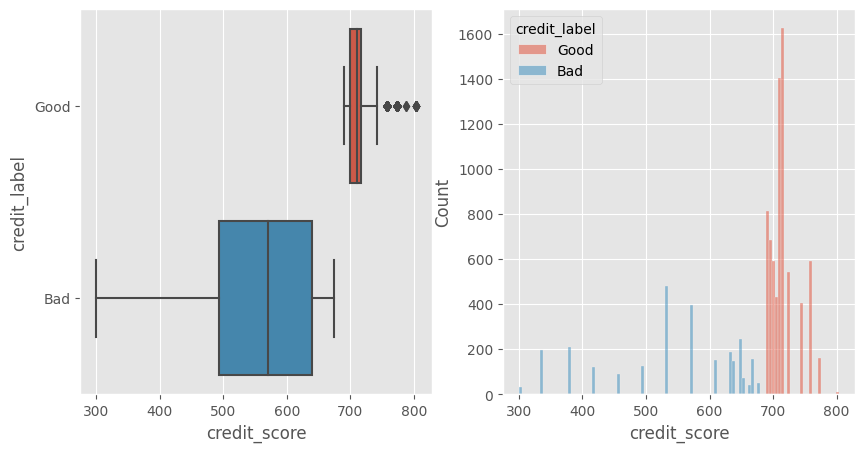

In [6]:
plt.show()
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="credit_score", y="credit_label",ax=axs[0])
sns.histplot(data=df, x='credit_score',hue='credit_label',ax=axs[1])
plt.show()

***Credit Label & Credit Rating***

Tương tự, bạn thấy với số lượng credit_label và số lượng credit_rating được xếp hạng dựa trên tiêu chí nào của bên cho vay này

In [7]:
x = df.groupby('credit_label')["credit_rating"].value_counts().to_frame().reset_index()
x = x.pivot(index='credit_label',columns='credit_rating',values='count').fillna(0).astype(int)
x

credit_rating,Kém,Trung bình,Tốt,Xuất sắc
credit_label,,,,
Bad,1812,910,0,0
Good,0,0,5563,1715


<Axes: xlabel='credit_rating', ylabel='credit_label'>

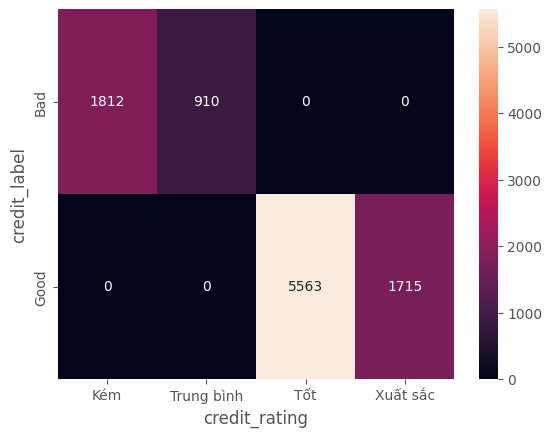

In [8]:
sns.heatmap(x,  annot=True, fmt=".0f")

***Credit Label & Approval Status***

Tương tự, họ có áp dụng với credit rating thì bạn có nhận xét gì về quyết định cho vay của họ

In [9]:
x = df.groupby('credit_label')["approval_status"].value_counts().to_frame().reset_index()
x = x.pivot(index='credit_label',columns='approval_status',values='count').fillna(0).astype(int)
x

approval_status,Chấp nhận,Từ chối
credit_label,,
Bad,526,2196
Good,7278,0


<Axes: xlabel='approval_status', ylabel='credit_label'>

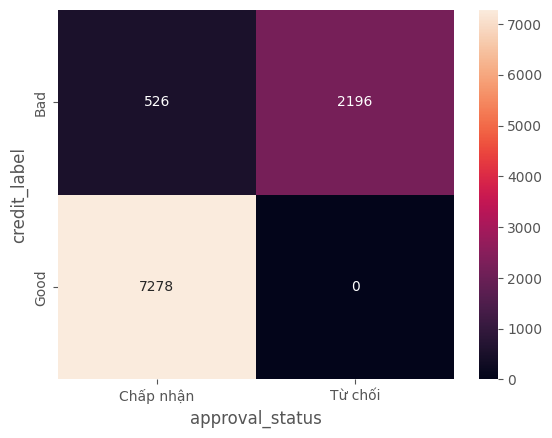

In [10]:
sns.heatmap(x,  annot=True, fmt=".0f")

***Credit Label & Reject Reason***

Top lý do reject là gì?

In [11]:
x = df.groupby('credit_label')["reject_reason"].value_counts().to_frame().reset_index()
x = x.pivot(index='credit_label',columns='reject_reason',values='count').fillna(0).astype(int).T.sort_values('Bad')[::-1]
x

credit_label,Bad
reject_reason,
Không đáp ứng yêu cầu tiêu chuẩn của ngân hàng,378
Chưa từng có kinh nghiệm vay tín dụng trước đây,351
Công việc không ổn định,347
Lịch sử tín dụng kém,259
Quá nhiều khoản vay,230
Điểm tín dụng thấp,227
Thu nhập không đủ,160
Không cung cấp đầy đủ thông tin,151
Không có lịch sử tín dụng,93


<Axes: xlabel='Bad', ylabel='reject_reason'>

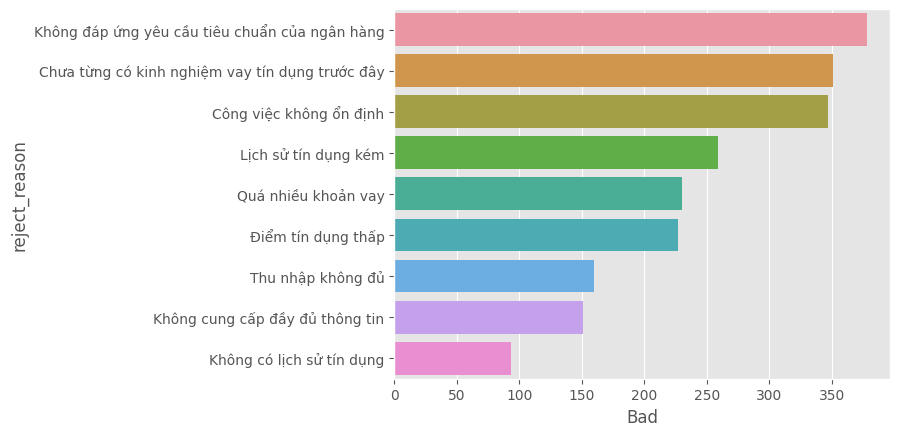

In [12]:
sns.barplot(x.reset_index(),x='Bad',y='reject_reason')

##### Credit Rating

Credit Rating phân phối như thế nào?

Tổ chức cho vay đó có lựa chọn tiêu chí gì không?

In [13]:
df['credit_rating'].value_counts().sort_index().to_frame()

,count
credit_rating,
Kém,1812
Trung bình,910
Tốt,5563
Xuất sắc,1715


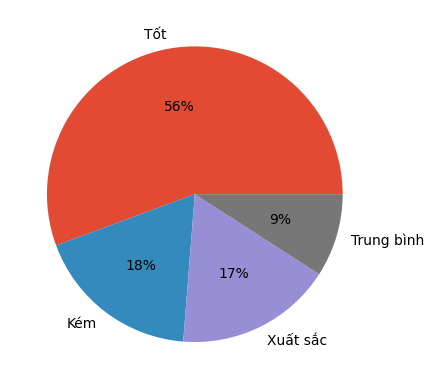

In [14]:
x = df['credit_rating'].value_counts().reset_index()
plt.pie(x['count'],labels=x['credit_rating'],autopct='%.0f%%')
plt.show()

- Range credit_score của mỗi credit-rating như thế nào
- Phân phối credit_score của mỗi credit-rating ra sao?

***Credit Rating & Credit Score***

In [15]:
df.groupby('credit_rating')["credit_score"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
credit_rating,,,,,,,,
Kém,1812,489,90,300,416,532,570,609
Trung bình,910,649,13,633,640,647,661,675
Tốt,5563,705,8,690,696,710,713,717
Xuất sắc,1715,746,16,727,727,742,758,804


Violin plot cũng là 1 dạng của boxplot nhưng nó có kèm KDE (kernel density estimation). KDE là 1 function để smooth các giá trị của continuous probability distribution

Tham khảo thêm
- https://en.wikipedia.org/wiki/Violin_plot
- https://seaborn.pydata.org/generated/seaborn.violinplot.html

Violin plot với 2 nhãn good,bad cho chúng ta thấy được distribution của từng categorical

Ví dụ: 

- Với rating Kém & label Bad (màu xanh quay xuống dưới)
  - Probability Distribution này cho chúng ta thông tin như sau: có 2 nhóm lớn KH tập trung ở khúc 550 và 340 FICO score
  - Không có khách hàng được label Good (đỏ)
  
- Với rating Xuất sắc & Good (góc dưới phải, màu đỏ và quay trên)
  - Probability Distribution mô ta: có 4 nhóm lớn KH tập trung ở khúc 720, 740, 760, 780 FICO score
  - Nhóm 780 là nhiều nhất
  - Không có khách hàng được label Bad (xanh)

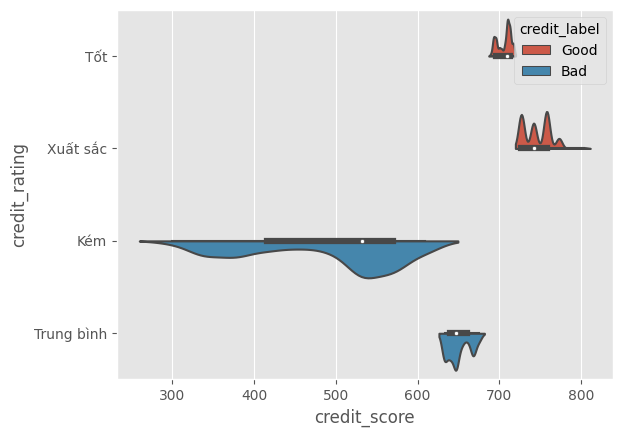

In [16]:
sns.violinplot(data=df, x="credit_score", y="credit_rating", hue="credit_label", split=True)
plt.show()

***Credit Rating & Approval Status***

In [17]:
x = df.groupby('credit_rating')["approval_status"].value_counts().to_frame().reset_index()
x = x.pivot(index='credit_rating',columns='approval_status',values='count').fillna(0).astype(int)
x

approval_status,Chấp nhận,Từ chối
credit_rating,,
Kém,0,1812
Trung bình,526,384
Tốt,5563,0
Xuất sắc,1715,0


***Credit Rating & Application Reason***

In [18]:
x = df.groupby('credit_rating')["application_reason"].value_counts().to_frame().reset_index()
x = x.pivot(index='credit_rating',columns='application_reason',values='count').fillna(0).astype(int).T
x

credit_rating,Kém,Trung bình,Tốt,Xuất sắc
application_reason,,,,
"Chi tiêu sinh nhật, lễ tết",81,34,232,74
Cắt giảm lãi suất,5,0,21,5
Kết hôn/đám cưới,0,0,1,0
"Làm đẹp, spa",65,28,172,49
Mua hàng điện tử,101,78,343,127
Mua máy tính/laptop,81,46,251,75
Mua mô tô,161,88,540,160
Mua sắm thiết bị gia đình,47,29,122,41
Mua sắm thời trang,96,45,259,74


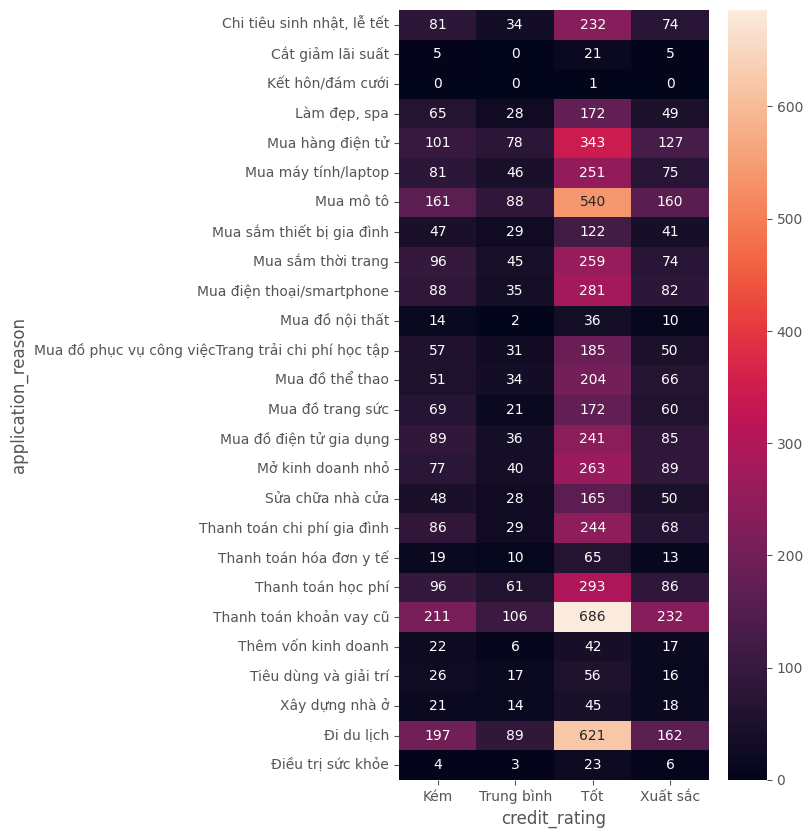

In [19]:
plt.figure(figsize=(5,10))
sns.heatmap(x, annot=True,fmt=".0f")
plt.show()

KH nhiều nhất ở cột "Tốt" và:
- Thanh toán khoản vay cũ
- Đi du lịch
- Mua ô tô
- Mua hàng điện tử

**Plot Credit-Score/Credit Limit và Credit Rating**

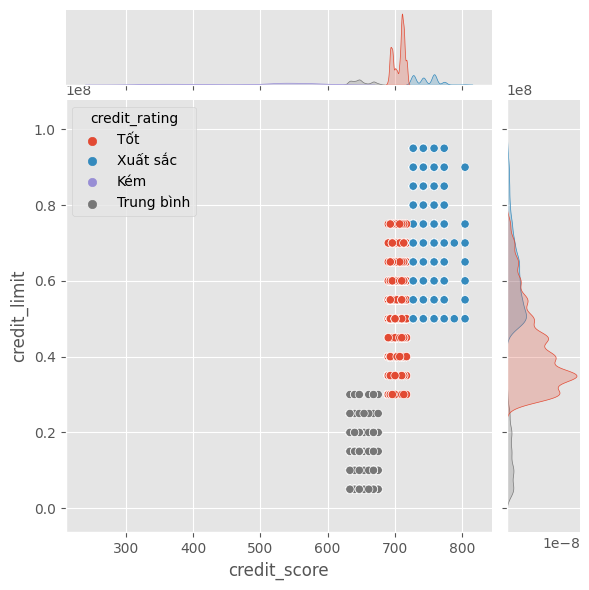

In [20]:
sns.jointplot(df, x='credit_score', y='credit_limit', hue='credit_rating')

Bạn thấy ko có **Kém** ở đây, nghĩa là với KH có tín dụng kém thì tổ chức này ko cho vay

> **Lưu ý**: đây chỉ là phân tích dựa trên 1 hoặc kết hợp 2 biến. Trên 2 biến trở lên, chúng ta không có nhiều cách visualize, nên mình để các bạn nghiên cứu tìm hiểu thêm phần này

Và đó là thông tin và cách bạn phân tích dữ liệu label của credit scoring. Trong thực tế, đôi lúc bạn sẽ không nhận ngay label mà phải qua các bước chuyển đổi để phù hợp từ yêu cầu của business.

### 2.2 Feature Analysis

Tương tự như Credit Risk Analysis, mình sẽ để bạn tự tìm insight về table **F_CUSTOMER_METAINFO**

Việc hiểu data insight của doanh nghiệp sẽ mất nhiều thời gian, các bạn có thể skip phần này

Dữ liệu mô tả khái quát các nội dung:
- Data định danh (demographic & member)
- Hoạt động tài khoản thành viên (member)
- Hoạt động giao dịch mua sắm (txn, payment)
- Hoạt động promotion (promotion)
- Thông tin về thu nhập, tài sản và thanh toán hóa đơn (income, asset, bill)

<img src="./static/hw2_metainfo.png" style="height: 300px;"/>

Bảng feature này có 62 columns: bao gồm thông tin định danh khách hàng và những cột quantitative analysis (mang giá trị phân biệt KH tốt xấu) dành cho model

Nhiệm vụ của bạn sẽ đào sâu vào và lựa chọn cột nào là định danh khách hàng, cột nào là làm dữ liệu tính toán


In [21]:
feat_data = pd.read_csv('./data/f_customer_metainfo.csv', index_col=0)
feat_data

,customer_id,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,email,...,num_interest_products,income_spending_ratio,income_stability,total_tax_amount,income_source,annually_income_segment,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount
0,4,4,Lưu Thái Q***h,Nữ,1992-04-02,"2966/30/79/105/117L, Lê Văn Phan, Phường Trườn...",Bình Phước,Việt Nam,(334)627-9420,jamesfoster@example.com,...,16,0.130391,Ổn định,721000,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Không,39500000,490032000
1,6,6,Quách Đức P****g,Nam,2001-03-29,"1214/80/48, Nguyễn Công Trứ, Phường An Lợi Đôn...",Bà Rịa - Vũng Tàu,Việt Nam,512-773-1909x73167,john90@example.net,...,17,0.107731,Thất thường,4945000,Làm thuê,Trên 1 tỷ,Căn hộ/Chung cư,Có,13600000,461592000
2,8,8,Lục Diễm N*a,Nữ,1997-11-13,"818/36/104/147/347I, Nguyễn Công Trứ, Phường A...",Bắc Giang,Việt Nam,(230)648-5970x1791,gabriel23@example.com,...,50,0.359191,Ổn định,2626000,Làm thuê,Trên 3 tỷ,Bất động sản thương mại,Có,6600000,111420000
3,24,24,Phan Thúy T***h,Nam,1991-01-19,"2824/24/188/155, Đường Số 4, Phường An Hòa, Gi...",Đồng Nai,Việt Nam,8574080007,randy45@example.org,...,9,0.479787,Rất ổn định,6639000,Freelancer,Dưới 300 triệu,Căn hộ/Chung cư,Có,8700000,331896000
4,30,30,Dương Tú T*m,Nam,1996-03-05,"1731/87/33/213/30D, Đinh Tiên Hoàng, Phường Ta...",Đà Nẵng,Việt Nam,(291)227-3285x5160,jcunningham@example.com,...,35,0.270903,Rất ổn định,5939000,Đầu tư,Trên 3 tỷ,Nhà ở chính,Không,19700000,124884000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99949,99949,Diệp Minh H*,Nam,1982-12-18,"90/113, Đường Lê Văn D, Phường Thảo Điền, Quận...",Hồ Chí Minh,Việt Nam,585.717.1884,lfischer@example.com,...,40,0.391744,Ổn định,2901000,Freelancer,Dưới 300 triệu,Bất động sản thương mại,Không,26300000,584412000
9996,99952,99952,Tiêu Quỳnh Đ**h,Nữ,1993-07-07,"965/5/97t, Điện Biên Phủ, Phường 10, Hà Đông, ...",Hồ Chí Minh,Việt Nam,430.595.0962x02367,jennifer82@example.net,...,13,0.927503,Ổn định,4913000,Kinh doanh truyền thống,Trên 1 tỷ,Đất đai,Không,600000,153312000
9997,99960,99960,Vương Phương Đ*i,Nữ,1996-02-12,"1936/82/102/78n, Lý Tự Trọng, Phường Thảo Điền...",Hà Nội,Việt Nam,+1-661-653-1628x7097,ericthompson@example.com,...,0,0.008358,Tạm ổn,5716000,Làm thuê,Trên 1 tỷ,Căn hộ/Chung cư,Có,28400000,87864000
9998,99966,99966,Vương Yến T***h,Nữ,1990-08-10,"1331/6/193/270/353, Trần Hưng Đạo, Phường Linh...",Bình Dương,Việt Nam,001-908-683-7798,pmiller@example.org,...,50,0.790364,Ổn định,9958000,Đầu tư,Dưới 300 triệu,Căn hộ/Chung cư,Không,25200000,170904000


# C. Conclusion

Qua bài tập 2, các bạn đã học được:
- 2 dạng table Dim & Fact
- 2 dạng database schema là Star & Snowflake
- Thông tin về định dạng và format table của Credit Risk
- Phân tích thông tin định lượng xung quanh label
- Xác định thông tin nào là định danh khách hàng, thông tin nào là định lượng dữ liệu của khách hàng
- Thông tin định lượng của khách hàng qua bảng feature 

Bài tập tiếp theo chúng ta sẽ đi vào phần Modeling